# 01 - Análise Exploratória de Dados (EDA)

Nesse Notebook vamos fazer uma analise exploratoria dos dados para responder o topico um do desafio!
"Faça uma análise exploratória dos dados (EDA), demonstrando as principais
características entre as variáveis e apresentando algumas hipóteses
relacionadas. Seja criativo"

## 1. Importação de bibliotecas e dataset

Nesse Pimeiro momento vamos realizar o carregamento dos dados e das bibliotecas:

Import das bibliotecas usadas:

In [222]:
#importando as libs!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.ticker import FuncFormatter

sns.set_theme(style="whitegrid")
# Formatador para mostrar valores em milhões quando fizer sentido
fmt_milhoes = FuncFormatter(lambda x, _: f"{x/1e6:.1f}M")
fmt_bilhoes = FuncFormatter(lambda x, _: f"{x/1e9:.1f}B")

Carregamento dos dados em um DataFrame Pandas, também nessa mesma celula realizei o tratamento removendo uma coluna de index a mais que surgiu no carregamento.

In [223]:
#carreagando os dados e o salvando em df
df = pd.read_csv('../data/raw/desafio_indicium_imdb.csv')
# dropar a coluna de índice redundante
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])


Testando se os dados foram carregado corretamente:

In [224]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


-------------------------------------------------------

## 2. Entendimento da base

### 2.1 Analise inicial da estrutura do dados:

Analisando os 5 primeiros elementos.

In [225]:
#analisando os 5 primeiros elementos do dataframe 
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Formato do DataFrame, linhas e colunas.

In [227]:
#analisando o número de linhas e colunas no df
print("Formato: ", df.shape)
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

Formato:  (999, 15)
Total de linhas: 999
Total de colunas: 15


Colunas presentes no DataFrame.

In [228]:
print("Colunas presentes no DF: ")
df.columns

Colunas presentes no DF: 


Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

Verificando a existencia de nulos por coluna:

In [229]:
# Verificando a existencia de dados nulos no df
print("Nulos por coluna:")
print(df.isna().sum())

#verificamos que de fato existem dados nulos, mais para frente iremos tratar eles durante o processo de modelagem.

Nulos por coluna:
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


Resumo das colunas: Tipo, quantidade de nulos, % de nulos, valores unicos.

In [230]:
print("Resumo informações colunas:")
summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "n_nulos": df.isna().sum(),
    "pct_nulos": (df.isna().sum()/len(df)*100).round(2),
    "n_unicos": df.nunique(dropna=True)
}).sort_values(["pct_nulos","n_unicos"], ascending=[False, True])

summary


Resumo informações colunas:


,dtype,n_nulos,pct_nulos,n_unicos
Gross,object,169,16.92,822
Meta_score,float64,157,15.72,63
Certificate,object,101,10.11,16
IMDB_Rating,float64,0,0.00,16
Released_Year,object,0,0.00,100
Runtime,object,0,0.00,140
Genre,object,0,0.00,202
Director,object,0,0.00,548
Star1,object,0,0.00,659
Star2,object,0,0.00,840


Verificando quantidade valores não nulos por coluna

In [231]:
#verficando de forma geral os valores por linha(tipo do dado e quantidade de não nulos)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB
None


Verificando a existência de linhas duplicadas.

In [232]:
# checar duplicados
print("\nDuplicados:", df.duplicated().sum())
#não existem linhas duplicadas dentro do df! 


Duplicados: 0


----------------------------------------------------

### 2.2 Tratando algumas colunas, para opereções futuras.

Com os resultados que obtive anteriormente, percebi que existem alguns tratamentos que são necessários fazer para não só analises futuras como também para o restante das etapas do desafio.

Ao observar a coluna `Genre`, percebi que há uma grande quantidade de valores únicos.  
Isso acontece porque cada filme pode ter mais de um gênero associado, o que gera combinações diferentes 
como `"Crime, Drama"`, `"Action, Crime, Drama"`, etc.  

Ou seja, `Genre` é uma **variável multi-rótulo**, e não uma simples categórica.  
Para tratá-la de forma adequada, precisaremos transformar essa coluna em um formato mais estruturado.


In [233]:
#percebendo a quantidade alta de valores unicos em genero resolvi explorar para ver o motivo
df[['Genre']]

,Genre
0,"Crime, Drama"
1,"Action, Crime, Drama"
2,"Crime, Drama"
3,"Crime, Drama"
4,"Action, Adventure, Drama"
...,...
994,"Comedy, Drama, Romance"
995,"Drama, Western"
996,"Drama, Romance, War"
997,"Drama, War"


Como a coluna `Genre` contém listas de gêneros separados por vírgula, 
o primeiro passo foi percorrer todos os filmes e extrair **os gêneros únicos presentes na base**.  
Isso nos permite saber **quantas categorias diferentes** existem e preparar o terreno para a criação de colunas binárias.  

Resultado: identificamos **21 gêneros distintos** no dataset.

In [234]:
#como podemos ver na celular os valores estão em lista, vamos percorrer e quabrar a as listas, assim pegando os valores unicos: 
# Lista para armazenar os gêneros únicos
lista_generos = []

# Percorre cada valor da coluna 'Genre'
for generos in df['Genre']:
    # Divide a string em gêneros individuais
    for g in generos.split(','):
        g = g.strip()  # remove espaços extras
        if g not in lista_generos:
            lista_generos.append(g)

print('total de generos distintos: ', len(lista_generos))
print(lista_generos)

# em termos de analise para nos é muito mais vantajoso criar colunas binarias para classificar os filems de acordo com os generos, 
# porém isso vai aumentar drasticamente a quantidade de colunas do nosso df. 

total de generos distintos:  21
['Crime', 'Drama', 'Action', 'Adventure', 'Biography', 'History', 'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'Comedy', 'Thriller', 'Animation', 'Family', 'War', 'Mystery', 'Music', 'Horror', 'Musical', 'Film-Noir', 'Sport']


Criei uma nova coluna chamada `Genres_list`, que transforma a string original em uma **lista limpa de gêneros**:
- Divide pelo separador vírgula.  
- Remove espaços extras.  
- Descarta valores vazios.  

Esse formato estruturado é mais fácil de manipular e garante consistência nos próximos passos.

In [235]:
# Genres_list: lista de gêneros por filme, sem espaços extras e sem vazios
df["Genres_list"] = (
    df["Genre"].fillna("")
      .apply(lambda s: [g.strip() for g in s.split(",") if g.strip() != ""])
)


Para tornar a análise mais eficiente, transformei os gêneros em variáveis binárias (dummies):
1. **Explosão (`explode`)**: cada filme passa a ter uma linha para cada gênero.  
   Exemplo: `"Action, Drama"` → duas linhas (`Action` e `Drama`).  
2. **Construção da tabela binária (`crosstab`)**: cada coluna corresponde a um gênero, 
com valores `1` (filme pertence ao gênero) ou `0` (não pertence).  
3. **Junção com o dataset original (`merge`)**: adicionamos as colunas de gêneros dummies ao `df`.

Esse processo nos permite, por exemplo:
- Contar a frequência de cada gênero.  
- Fazer análises comparativas entre filmes de diferentes gêneros.  
- Usar os gêneros como variáveis em modelos preditivos.


In [236]:
# Explode: uma linha por (filme, gênero)
tmp = df[["Series_Title", "Genres_list"]].explode("Genres_list")

# Tabela binária (filme x gênero)
genre_dummies = pd.crosstab(tmp["Series_Title"], tmp["Genres_list"]).astype(int)
genre_dummies.columns.name = None  # só estética

# Anexar ao df (sem risco de duplicar nomes)
df = df.merge(genre_dummies, left_on="Series_Title", right_index=True, how="left")


Em seguida vamos fazer a verificação de como ficou de fato o DataFrame depois das modificações

In [237]:
df.shape

(999, 37)

In [238]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Genres_list', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [239]:
# pronto agora temos colunas binarias para cada genero com uns e zeros, 
# se tal filme pertence a um genero x ela vai possuir um na coluna desse genero x
df.head(4)


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,0,0,0,0,0,0,0,0,0,0
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,...,0,0,0,0,0,0,0,0,0,0
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,...,0,0,0,0,0,0,0,0,0,0


 Conclusões parciais sobre `Genre`

- Foram identificados **21 gêneros distintos** no dataset.  
- Cada filme pode ter múltiplos gêneros; por isso, optamos por um tratamento multi-rótulo.  
- Agora é possível analisar os gêneros de forma estruturada e utilizá-los em análises estatísticas ou modelos.  




-------------------------------------------------------------------------------------------





A coluna **`Runtime`** veio como texto no formato `"XXX min"`, o que impede cálculos
estatísticos (média, correlação, gráficos, etc.).  
Para padronizar, criei a função `parse_runtime_min` que:

- trata valores nulos com segurança;
- usa uma expressão regular para **extrair o primeiro número** presente no texto  
  (ex.: `"142 min"` → `142`);
- retorna o valor como **numérico** (float).

Em seguida, aplicamos essa função à coluna `Runtime` para gerar a nova variável
**`Runtime_min`**, que será utilizada nas análises e visualizações a seguir.

In [240]:
#observando os valores da coluna runtime, podemos transforma ele em números para facilitar as nosssas analises

def parse_runtime_min(s):
    if pd.isna(s): 
        return np.nan
    # captura o primeiro número que aparecer (ex: "142 min" -> 142)
    m = re.search(r'(\d+)', str(s))
    return float(m.group(1)) if m else np.nan

df["Runtime_min"] = df["Runtime"].apply(parse_runtime_min)


Para garantir que a conversão foi feita corretamente:

1. Comparei os **três primeiros valores** de `Runtime` (texto) com os respectivos
   valores em `Runtime_min` (numérico).
2. Exibi o **resumo estatístico** de `Runtime_min` (`count`, `mean`, `std`,
   quartis e máximo).

In [241]:
#verificação rapida, para ver se foi tudo feito corretamente 
print(df["Runtime"].head(3).tolist(), "→", df["Runtime_min"].head(3).tolist())
df["Runtime_min"].describe()

['175 min', '152 min', '202 min'] → [175.0, 152.0, 202.0]


count    999.000000
mean     122.871872
std       28.101227
min       45.000000
25%      103.000000
50%      119.000000
75%      137.000000
max      321.000000
Name: Runtime_min, dtype: float64

---------------------------------------------------------------------------------------------

A coluna **`Gross`** representa o faturamento do filme, mas está no formato de texto,
contendo **vírgulas e símbolos** (ex.: `"134,966,411"`).  
Esse formato impede que possamos calcular médias, correlações ou usar a variável
em modelos preditivos.


In [242]:
#outra coluna que podemos tratar é gross do df, veja: 
df['Gross']

0      134,966,411
1      534,858,444
2       57,300,000
3        4,360,000
4      377,845,905
          ...     
994            NaN
995            NaN
996     30,500,000
997            NaN
998            NaN
Name: Gross, Length: 999, dtype: object

Criei a função `parse_gross` que:
- trata valores nulos (`NaN`);
- remove qualquer caractere que **não seja dígito**;
- converte o resultado em `float`.

O resultado foi salvo em uma nova coluna chamada **`Gross_float`**, que representa
o faturamento já em formato numérico.

In [243]:
# remove tudo que não é dígito (",","." e símbolos)
def parse_gross(s):
    if pd.isna(s):
        return np.nan
   
    digits = re.sub(r"[^\d]", "", str(s))
    return float(digits) if digits else np.nan

df["Gross_float"] = df["Gross"].apply(parse_gross)


In [244]:
print(df["Gross"].head(3).tolist(), "→", df["Gross_float"].head(3).tolist())
df["Gross_float"].describe()


['134,966,411', '534,858,444', '57,300,000'] → [134966411.0, 534858444.0, 57300000.0]


count    8.300000e+02
mean     6.808257e+07
std      1.098076e+08
min      1.305000e+03
25%      3.245338e+06
50%      2.345744e+07
75%      8.087634e+07
max      9.366622e+08
Name: Gross_float, dtype: float64

---------------------------------------------------------------------------

A coluna **`Released_Year`** representa o ano de lançamento do filme.  
No entanto, ela está armazenada como **`object` (texto)**, o que dificulta análises estatísticas e operações numéricas.


In [245]:
#outra coluna que podemos tratar é a referente ao ano, veja: (atualmente sendo do tipo object, o que pode dificultar algumas analises)
df['Released_Year']

0      1972
1      2008
2      1974
3      1957
4      2003
       ... 
994    1961
995    1956
996    1953
997    1944
998    1935
Name: Released_Year, Length: 999, dtype: object

Converti a coluna `Released_Year` para **formato numérico (`float64`)**, utilizando `pd.to_numeric` com o parâmetro `errors="coerce"`.  

Esse parâmetro garante que valores inválidos (como classificações equivocadas ou strings que não representam anos) sejam convertidos para **`NaN`**, evitando erros de processamento.


In [246]:
#agora os anos são do tipo numerico, o que nos possibilita fazer alguamas analises como: 
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["Released_Year"].describe()

count     998.000000
mean     1991.214429
std        23.308539
min      1920.000000
25%      1976.000000
50%      1999.000000
75%      2009.000000
max      2020.000000
Name: Released_Year, dtype: float64

-----------------------------------------------------------------------------

In [247]:
# Tabela resumo só das colunas numéricas 
num_cols = ["IMDB_Rating","Meta_score","No_of_Votes","Runtime_min","Gross_float","Released_Year"]
display(df[num_cols].describe().T.assign(n_nulos=df[num_cols].isna().sum()))


,count,mean,std,min,25%,50%,75%,max,n_nulos
IMDB_Rating,999.0,7.947948e+00,2.722895e-01,7.6,7.7,7.9,8.10,9.2,0
Meta_score,842.0,7.796912e+01,1.238326e+01,28.0,70.0,79.0,87.00,100.0,157
No_of_Votes,999.0,2.716214e+05,3.209126e+05,25088.0,55471.5,138356.0,373167.50,2303232.0,0
Runtime_min,999.0,1.228719e+02,2.810123e+01,45.0,103.0,119.0,137.00,321.0,0
Gross_float,830.0,6.808257e+07,1.098076e+08,1305.0,3245338.5,23457439.5,80876340.25,936662225.0,169
Released_Year,998.0,1.991214e+03,2.330854e+01,1920.0,1976.0,1999.0,2009.00,2020.0,1


## 3. Outliers identificação e diagnóstico + Analise descritiva basica:


**Objetivo:** detectar valores extremos que podem distorcer estatísticas, gráficos e modelos — e **documentar** o que encontramos.  
**Decisão:** nesta EDA **não vamos remover nem imputar**; apenas **medir e visualizar**. O tratamento fica para a fase de **modelagem**.

**Métodos usados**
- **IQR (Tukey)**, **Z-score (|z|>3)** e **Z-score robusto (MAD, |z|>3.5)**.  

**Variáveis numéricas analisadas:** as numéricas de `df` (incluindo, se existirem: `IMDB_Rating`, `No_of_Votes`, `Gross_float`, `Meta_score`, `Runtime_min`, `Released_Year`).


### 3.1 Funções de detecção (IQR, Z, MAD) — sem imports (usa pandas/numpy já carregados)

In [248]:
# ----- 1) Whitelist de variáveis contínuas relevantes -----
cont_cols = [c for c in ['Released_Year','IMDB_Rating','Meta_score','No_of_Votes','Runtime_min','Gross_float'] if c in df.columns]
print("Variáveis contínuas utilizadas:", cont_cols)



Variáveis contínuas utilizadas: ['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime_min', 'Gross_float']


In [249]:
def _finite(s):
    return s[np.isfinite(s)]

def iqr_limits(s, k=1.5):
    s = _finite(s.dropna())
    if len(s) == 0:
        return np.nan, np.nan
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - k*iqr, q3 + k*iqr

def iqr_flags(s, k=1.5):
    low, high = iqr_limits(s, k=k)
    if pd.isna(low) or pd.isna(high):
        return pd.Series(False, index=s.index)
    return (s < low) | (s > high)

def zscore_flags(s, thr=3.0):
    mu = s.mean(skipna=True)
    sd = s.std(skipna=True, ddof=0)
    if not np.isfinite(sd) or sd == 0:
        return pd.Series(False, index=s.index)
    z = (s - mu) / sd
    return z.abs() > thr

def mad_flags(s, thr=3.5):
    med = s.median(skipna=True)
    mad = (s - med).abs().median(skipna=True)
    if not np.isfinite(mad) or mad == 0:
        return pd.Series(False, index=s.index)
    zrob = 0.6745 * (s - med) / mad
    return zrob.abs() > thr


In [250]:
rows, flag_cols = [], {}
for col in cont_cols:
    s = df[col]
    low, high = iqr_limits(s)
    f_iqr = iqr_flags(s).reindex(df.index, fill_value=False)
    f_z   = zscore_flags(s).reindex(df.index, fill_value=False)
    f_mad = mad_flags(s).reindex(df.index, fill_value=False)

    flag_cols[f'out_IQR__{col}'] = f_iqr
    flag_cols[f'out_Z__{col}']   = f_z
    flag_cols[f'out_MAD__{col}'] = f_mad

    rows.append({
        'variable': col,
        'n': int(s.notna().sum()),
        'missing_%': float((s.isna().mean()*100).round(2)),
        'min': float(s.min(skipna=True)) if s.notna().any() else np.nan,
        'p25': float(s.quantile(0.25)) if s.notna().any() else np.nan,
        'median': float(s.median(skipna=True)) if s.notna().any() else np.nan,
        'mean': float(s.mean(skipna=True)) if s.notna().any() else np.nan,
        'p75': float(s.quantile(0.75)) if s.notna().any() else np.nan,
        'max': float(s.max(skipna=True)) if s.notna().any() else np.nan,
        'iqr_low': float(low) if np.isfinite(low) else np.nan,
        'iqr_high': float(high) if np.isfinite(high) else np.nan,
        'outliers_IQR': int(f_iqr.sum()),
        'outliers_Z3': int(f_z.sum()),
        'outliers_MAD3_5': int(f_mad.sum()),
    })

summary_outliers = pd.DataFrame(rows).sort_values('variable').reset_index(drop=True)
flags_df = pd.DataFrame(flag_cols)
flags_df['is_outlier_any'] = flags_df.any(axis=1)

display(summary_outliers)

,variable,n,missing_%,min,p25,median,mean,p75,max,iqr_low,iqr_high,outliers_IQR,outliers_Z3,outliers_MAD3_5
0,Gross_float,830,16.92,1305.0,3245338.5,23457439.5,6.808257e+07,80876340.25,936662225.0,-1.132012e+08,1.973228e+08,88,16,130
1,IMDB_Rating,999,0.00,7.6,7.7,7.9,7.947948e+00,8.10,9.2,7.100000e+00,8.700000e+00,12,12,4
2,Meta_score,842,15.72,28.0,70.0,79.0,7.796912e+01,87.00,100.0,4.450000e+01,1.125000e+02,7,5,4
3,No_of_Votes,999,0.00,25088.0,55471.5,138356.0,2.716214e+05,373167.50,2303232.0,-4.210725e+05,8.497115e+05,66,20,115
4,Released_Year,998,0.10,1920.0,1976.0,1999.0,1.991214e+03,2009.00,2020.0,1.926500e+03,2.058500e+03,7,2,7
5,Runtime_min,999,0.00,45.0,103.0,119.0,1.228719e+02,137.00,321.0,5.200000e+01,1.880000e+02,29,10,10


### 3.2 Análise descritiva(plotagem gráficas e calculos!) 

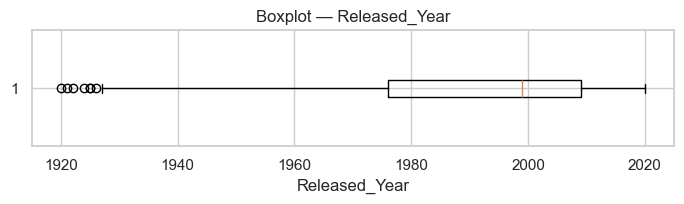

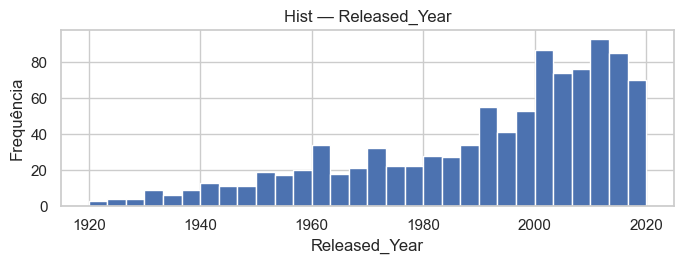

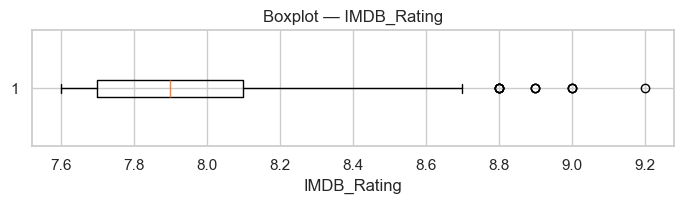

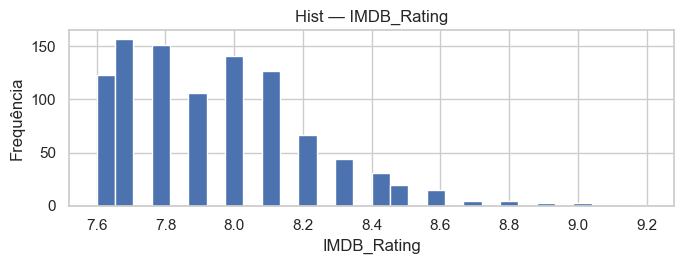

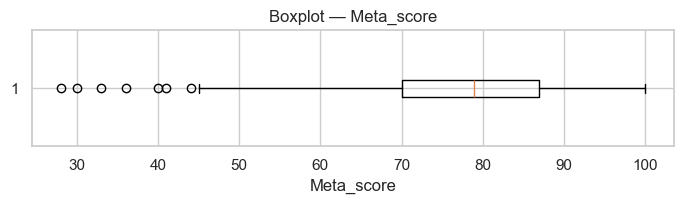

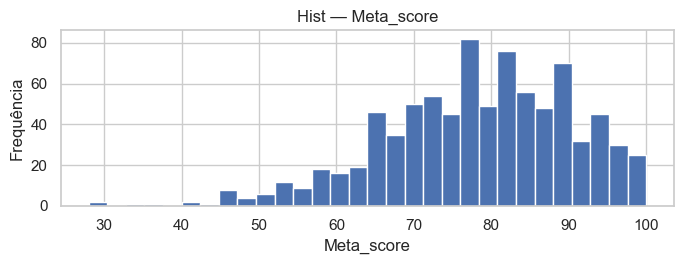

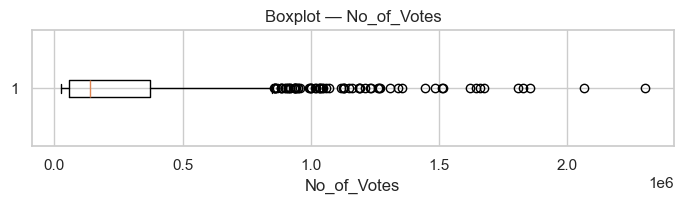

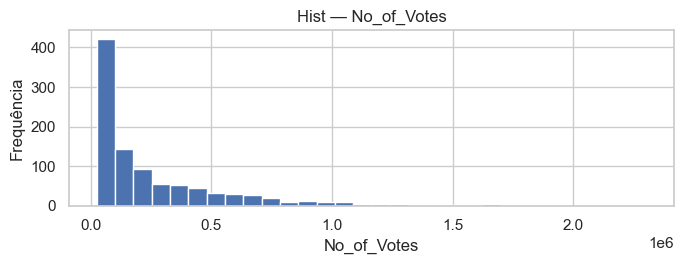

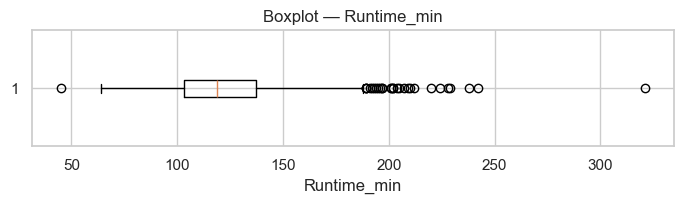

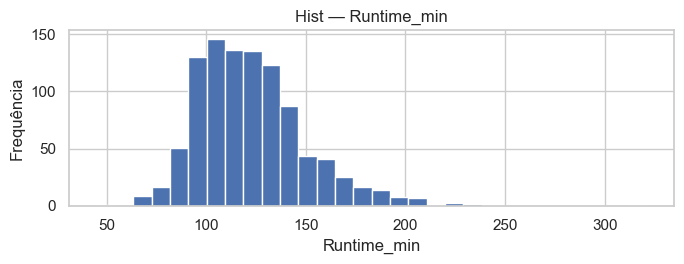

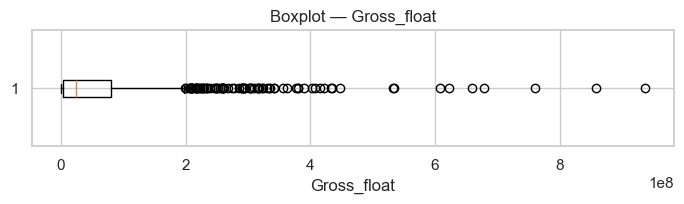

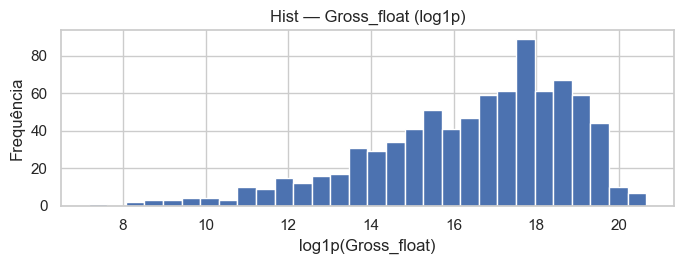

In [251]:
for col in cont_cols:
    s = df[col].dropna()
    if s.empty: 
        continue

    # Boxplot
    plt.figure(figsize=(7, 2.2))
    plt.boxplot(s, vert=False, whis=1.5, showfliers=True)
    plt.title(f'Boxplot — {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

    # Histograma (log1p quando há cauda longa positiva)
    use_log = (s.gt(0).all()) and (s.max() / max(s.min(), 1) > 200)
    plt.figure(figsize=(7, 2.8))
    plt.hist(np.log1p(s) if use_log else s, bins=30)
    plt.title(f'Hist — {col}' + (' (log1p)' if use_log else ''))
    plt.xlabel('log1p('+col+')' if use_log else col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()


In [252]:
# Estatísticas básicas das variáveis numéricas contínuas
df[['Released_Year','IMDB_Rating','Meta_score','No_of_Votes','Runtime_min','Gross_float']].describe().T

,count,mean,std,min,25%,50%,75%,max
Released_Year,998.0,1.991214e+03,2.330854e+01,1920.0,1976.0,1999.0,2009.00,2020.0
IMDB_Rating,999.0,7.947948e+00,2.722895e-01,7.6,7.7,7.9,8.10,9.2
Meta_score,842.0,7.796912e+01,1.238326e+01,28.0,70.0,79.0,87.00,100.0
No_of_Votes,999.0,2.716214e+05,3.209126e+05,25088.0,55471.5,138356.0,373167.50,2303232.0
Runtime_min,999.0,1.228719e+02,2.810123e+01,45.0,103.0,119.0,137.00,321.0
Gross_float,830.0,6.808257e+07,1.098076e+08,1305.0,3245338.5,23457439.5,80876340.25,936662225.0


In [253]:
for col in ['Certificate','Director']:
    print(f"Moda de {col}: {df[col].mode()[0]}")

Moda de Certificate: U
Moda de Director: Alfred Hitchcock


Como cada gênero foi transformado em uma coluna binária (0/1), a “moda” não é calculada como em variáveis categóricas normais.  
Aqui, somamos cada coluna binária para identificar quais gêneros são mais comuns entre os filmes.

Top gêneros mais frequentes:
Drama        725
Comedy       233
Crime        211
Adventure    196
Action       189
Thriller     138
Romance      125
Biography    109
Mystery      100
Animation     82
dtype: int64


<Axes: title={'center': 'Frequência dos gêneros nos filmes'}>

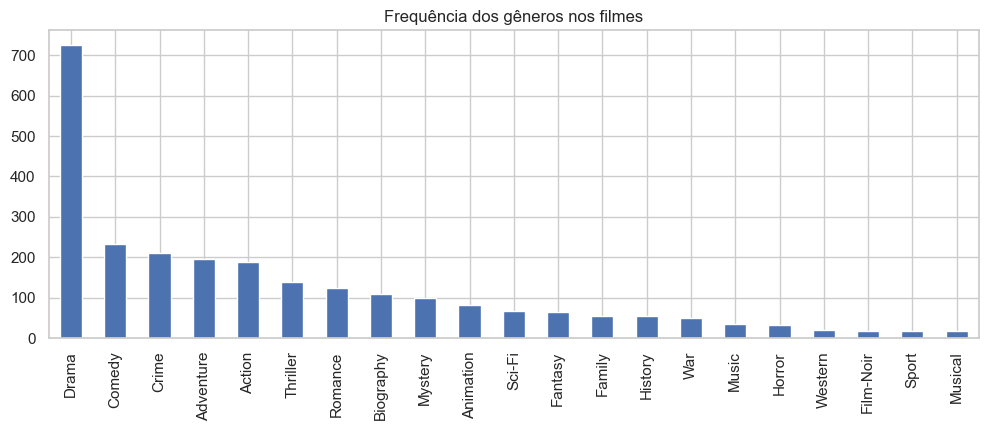

In [254]:
# Selecionar apenas as colunas binárias de gênero
genre_cols = ['Action','Adventure','Animation','Biography','Comedy','Crime',
              'Drama','Family','Fantasy','Film-Noir','History','Horror','Music',
              'Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western']

# Contagem de quantos filmes têm cada gênero
genre_counts = df[genre_cols].sum().sort_values(ascending=False)

print("Top gêneros mais frequentes:")
print(genre_counts.head(10))

# Visualização
genre_counts.plot(kind='bar', figsize=(12,4), title="Frequência dos gêneros nos filmes")


### 3.3 Interpretação e conclusão dos outliers


-INTERPRETAÇÃO:
- **Released_Year:** a maioria dos filmes está entre 1970 e 2020. Alguns registros mais antigos são raros, mas plausíveis.  
- **IMDB_Rating:** concentrado entre 7.5 e 8.5. Valores acima de 8.6 são raros e aparecem como outliers.  
- **Meta_score:** distribuição razoável, mas com alguns outliers em valores baixos (<40).  
- **No_of_Votes:** altamente assimétrica (cauda longa). Poucos filmes ultrapassam 1 milhão de votos → blockbusters.  
- **Runtime_min:** maioria entre 90–150 min. Filmes acima de 240 min ou muito curtos (<60 min) aparecem como outliers.  
- **Gross_float:** distribuição também assimétrica. Filmes com bilheteria superior a 500M aparecem como outliers.

-CONCLUSÃO:
- Parte dos outliers corresponde a **sucessos legítimos** (ex.: bilheterias e votos muito altos).  
- Em outras variáveis (ex.: `Runtime_min`, `Meta_score`), valores muito baixos ou altos podem ser **ruído** ou casos excepcionais.  
- Nesta fase de **EDA**: apenas **identificamos e documentamos**. Tratamentos serão realizados nas proximas etapas do desafio que correspondem a modelagem.

## 4. Analises Graficas da Base de Dados:

Nesta etapa realizo uma exploração **visual** das variáveis do dataset.  
A análise está dividida em categorias temáticas para facilitar a interpretação: distribuições gerais, correlações, evolução temporal, influência de gêneros/classificação e aspectos de popularidade e bilheteria.

> **Observação importante:** alguns gráficos (como boxplots e histogramas) já apareceram na etapa de **outliers** (Seção 3).  
> A diferença é que, aqui, o objetivo não é apenas diagnóstico, mas sim **entender a distribuição geral e buscar padrões mais amplos**.  
> Ou seja, o contexto é diferente: antes eu olhava para detecção de valores extremos, agora busco **compreender tendências globais**.

Ao final desta seção apresento algumas **hipóteses exploratórias** que podem ser testadas em etapas futuras de modelagem.


### 4.1 Distribuições Gerais

Nesta parte busco entender como variáveis-chave do dataset se distribuem individualmente.  
Incluo:
- Notas do IMDB  
- Meta_score  
- Duração dos filmes  
- Bilheteria (Gross)  

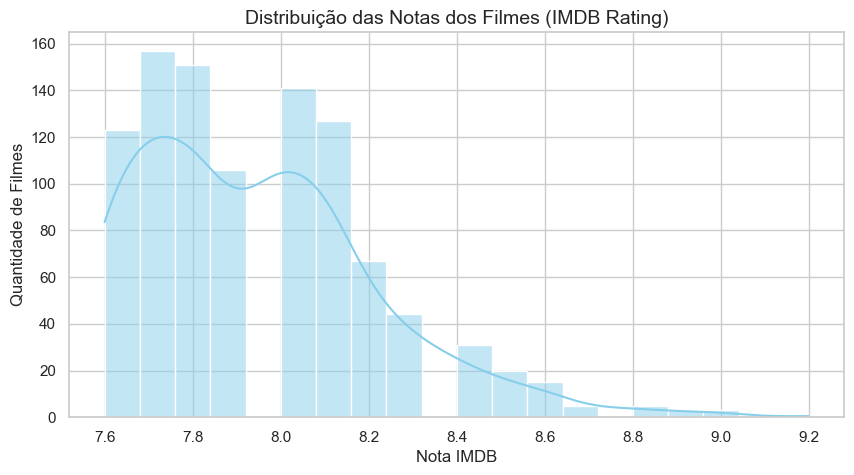

In [255]:
plt.figure(figsize=(10,5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color="skyblue")
plt.title("Distribuição das Notas dos Filmes (IMDB Rating)", fontsize=14)
plt.xlabel("Nota IMDB")
plt.ylabel("Quantidade de Filmes")
plt.show()


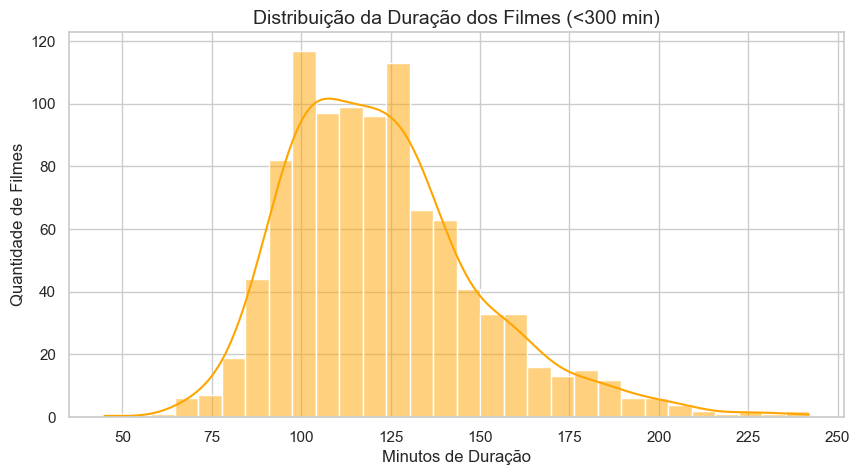

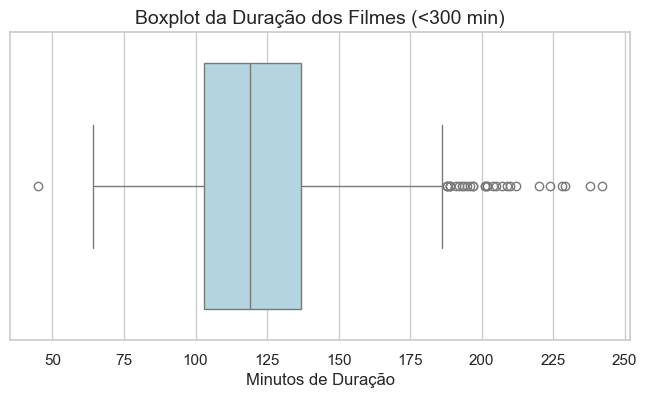

In [256]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Runtime_min'] < 300]['Runtime_min'], bins=30, kde=True, color="orange")
plt.title("Distribuição da Duração dos Filmes (<300 min)", fontsize=14)
plt.xlabel("Minutos de Duração")
plt.ylabel("Quantidade de Filmes")
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df[df['Runtime_min'] < 300]['Runtime_min'], color="lightblue")
plt.title("Boxplot da Duração dos Filmes (<300 min)", fontsize=14)
plt.xlabel("Minutos de Duração")
plt.show()


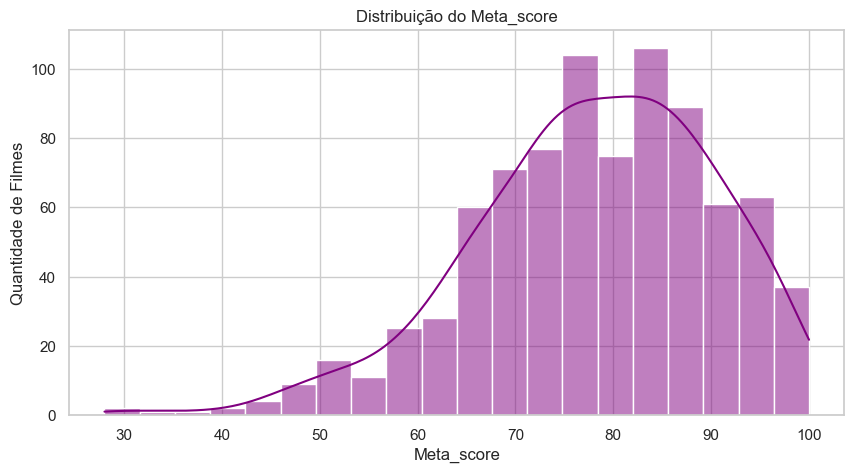

In [257]:
plt.figure(figsize=(10,5))
sns.histplot(df["Meta_score"].dropna(), bins=20, color="purple", kde=True)
plt.title("Distribuição do Meta_score")
plt.xlabel("Meta_score")
plt.ylabel("Quantidade de Filmes")
plt.show()


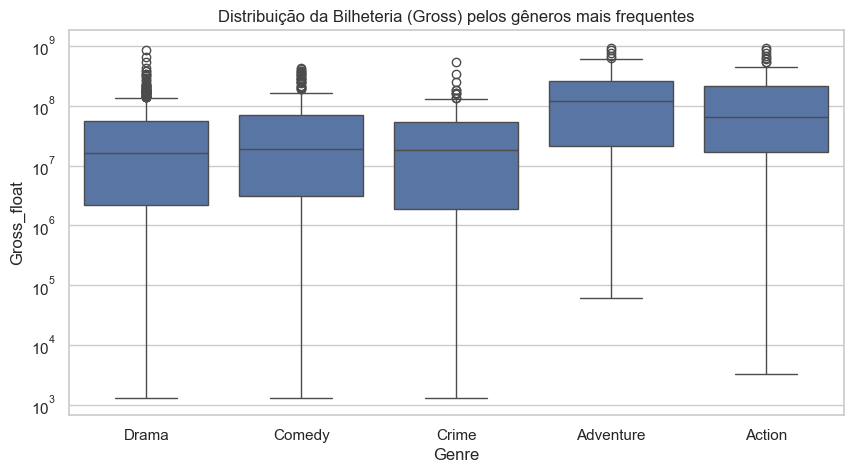

In [258]:
# Top 5 gêneros mais frequentes
genre_cols = ['Action','Adventure','Animation','Biography','Comedy','Crime',
              'Drama','Family','Fantasy','Film-Noir','History','Horror','Music',
              'Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western']

genre_counts = df[genre_cols].sum().sort_values(ascending=False)
top_genres = genre_counts.head(5).index.tolist()

# Boxplot da bilheteria por gênero (usando dummies)
melted = df.melt(id_vars=['Gross_float'], value_vars=top_genres,
                 var_name='Genre', value_name='is_genre')
melted = melted[melted['is_genre']==1]

plt.figure(figsize=(10,5))
sns.boxplot(data=melted, x='Genre', y='Gross_float')
plt.yscale("log")  # escala log pq bilheteria é muito assimétrica
plt.title("Distribuição da Bilheteria (Gross) pelos gêneros mais frequentes")
plt.show()


### 4.2 Correlação e Relações:

Aqui exploro como as variáveis numéricas se relacionam entre si.  
Uso:
- Heatmap de correlação  
- Pairplot para múltiplas combinações  
- Scatterplots direcionados (ex.: Meta_score × IMDB, Votos × Bilheteria, Receita × Nota)

O objetivo é entender dependências e identificar potenciais relações de associação.


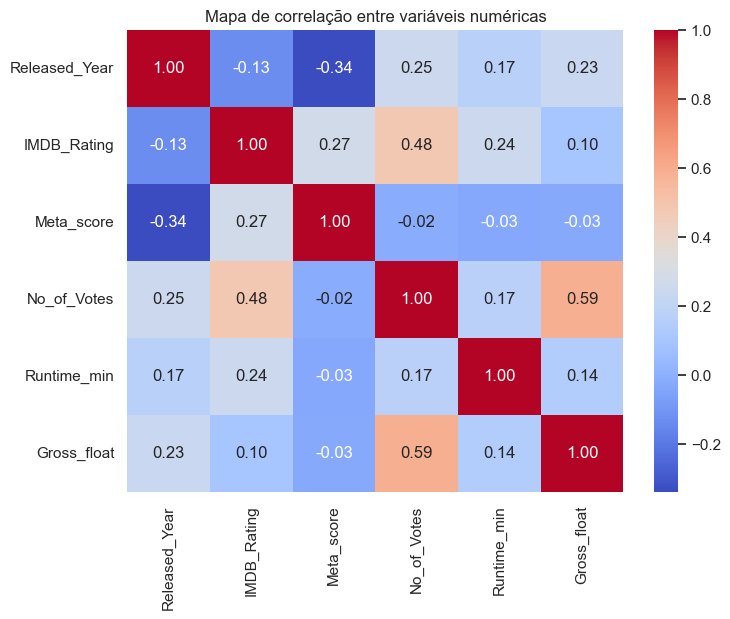

In [259]:
# Correlação entre variáveis numéricas
plt.figure(figsize=(8,6))
sns.heatmap(df[['Released_Year','IMDB_Rating','Meta_score','No_of_Votes','Runtime_min','Gross_float']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlação entre variáveis numéricas")
plt.show()


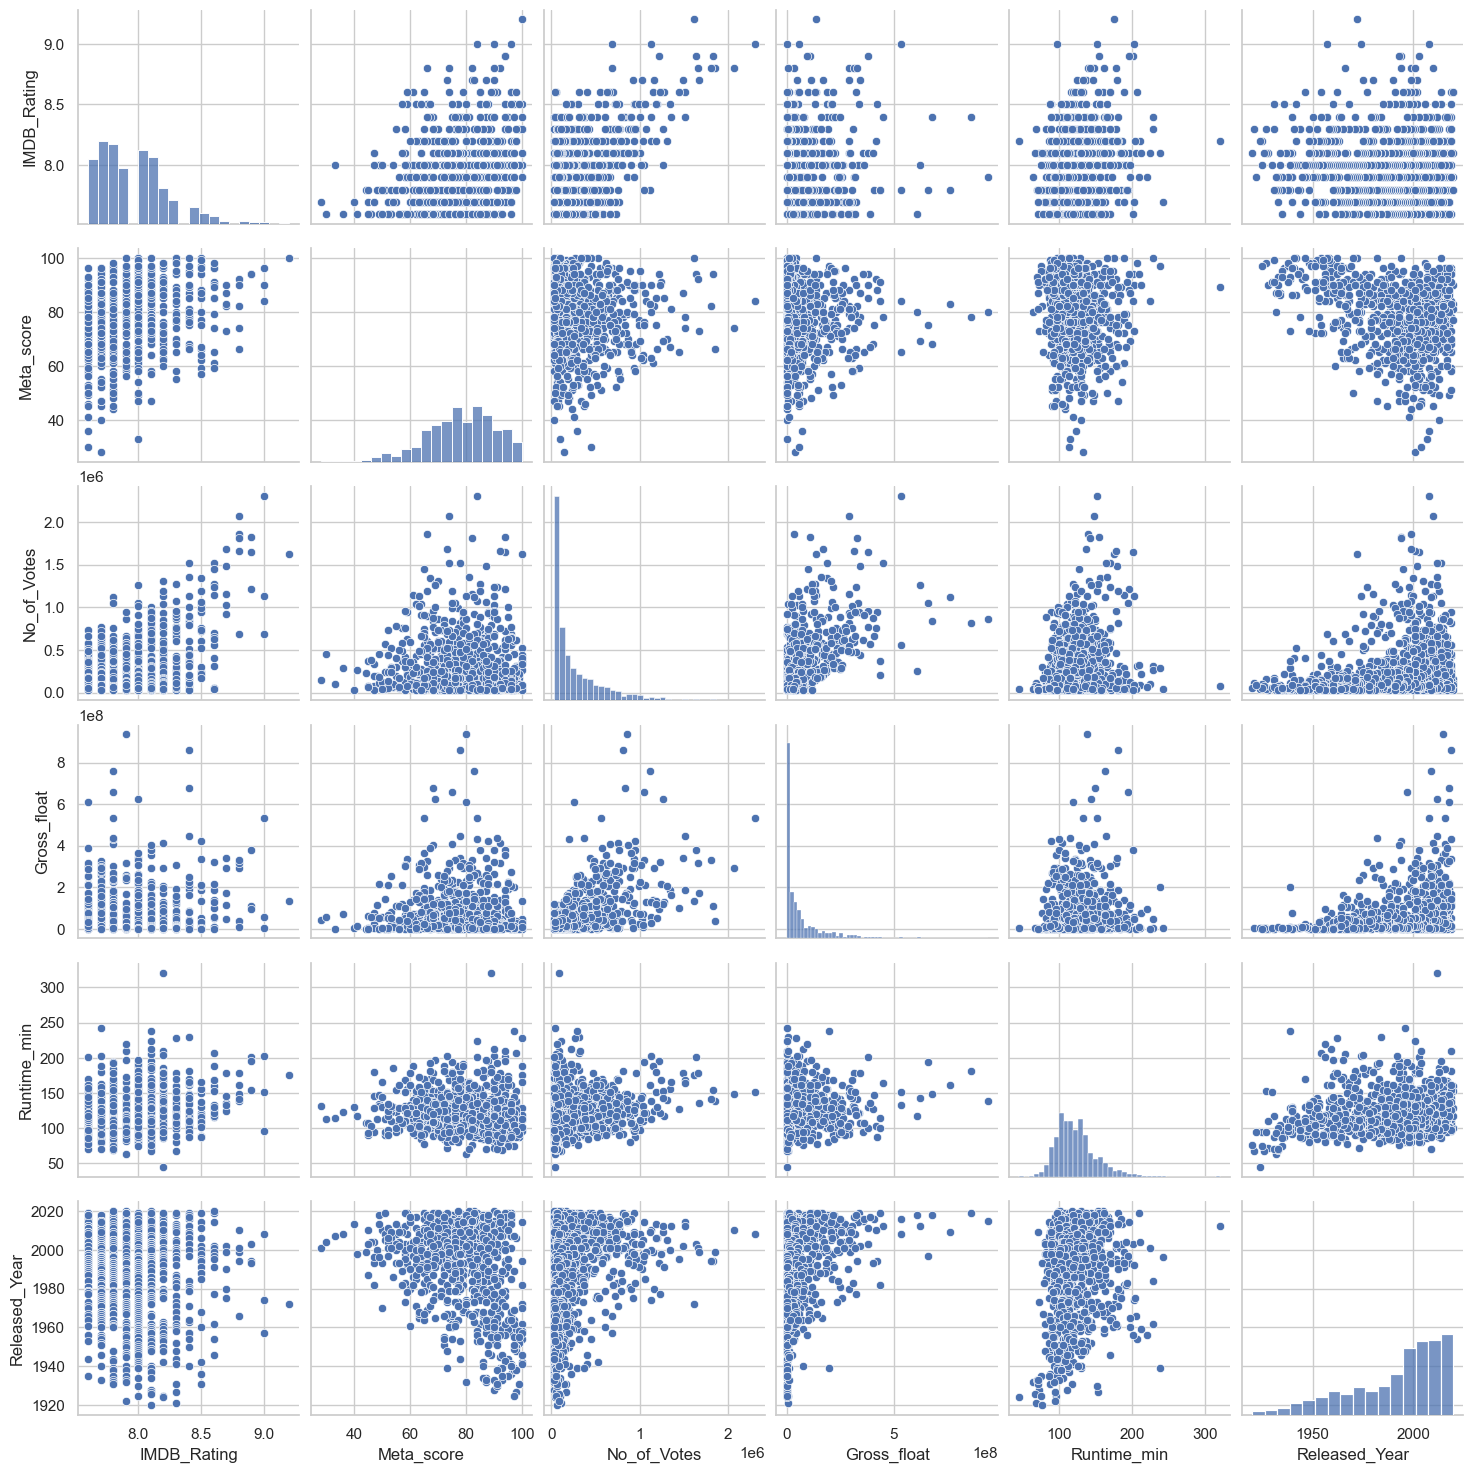

In [260]:
sns.pairplot(df[['IMDB_Rating','Meta_score','No_of_Votes','Gross_float','Runtime_min', 'Released_Year']])


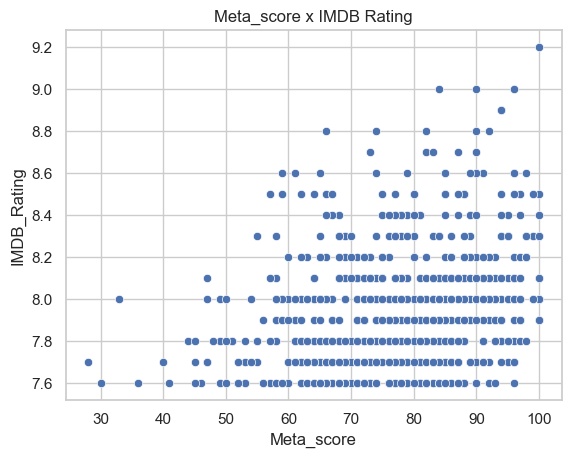

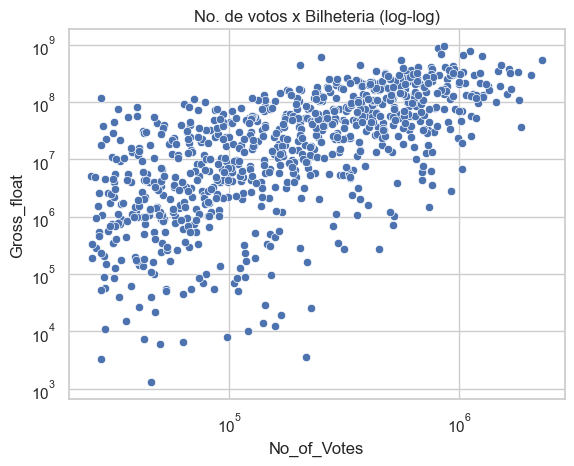

In [261]:
sns.scatterplot(data=df, x="Meta_score", y="IMDB_Rating")
plt.title("Meta_score x IMDB Rating")
plt.show()

sns.scatterplot(data=df, x="No_of_Votes", y="Gross_float")
plt.xscale("log"); plt.yscale("log")
plt.title("No. de votos x Bilheteria (log-log)")
plt.show()



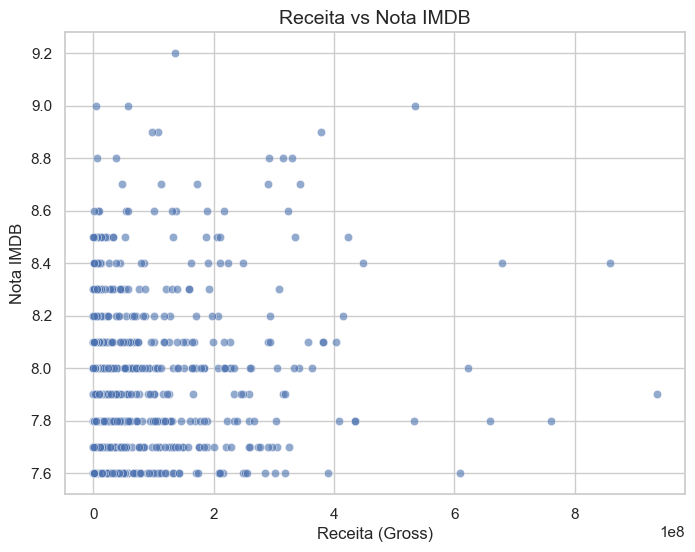

In [262]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Gross_float", y="IMDB_Rating", data=df, alpha=0.6)
plt.title("Receita vs Nota IMDB", fontsize=14)
plt.xlabel("Receita (Gross)")
plt.ylabel("Nota IMDB")
plt.show()


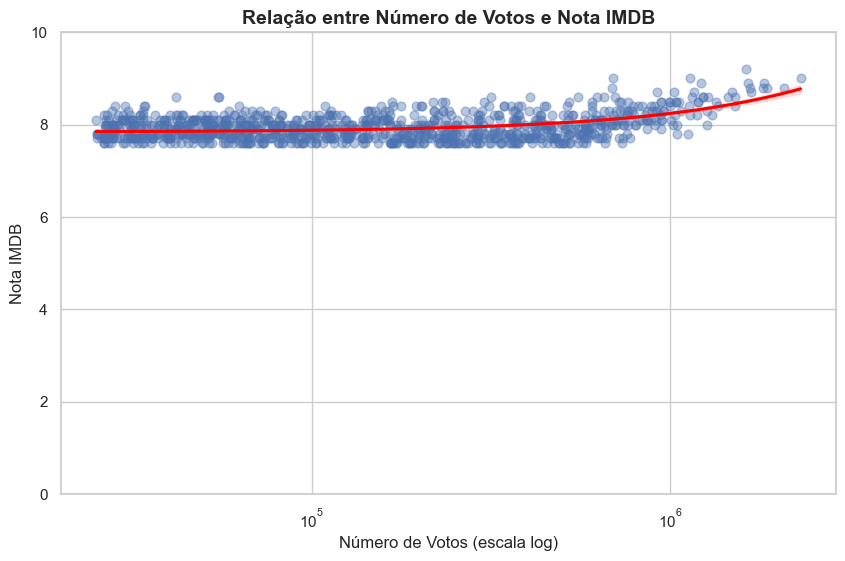

In [263]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x="No_of_Votes",
    y="IMDB_Rating",
    scatter_kws={'alpha':0.4, 's':40},  # transparência e tamanho dos pontos
    line_kws={'color':'red'}            # linha de tendência
)

plt.xscale("log")  # escala log para lidar com cauda longa
plt.title("Relação entre Número de Votos e Nota IMDB", fontsize=14, weight="bold")
plt.xlabel("Número de Votos (escala log)")
plt.ylabel("Nota IMDB")
plt.ylim(0, 10)
plt.show()


### 4.3 Análises Temporais: 

Nesta subseção avalio a evolução dos filmes ao longo do tempo:
- Volume de lançamentos por ano/década  
- Evolução da média das notas IMDB por década  
- Evolução da média do Meta_score por década  
- Anos com maior concentração de lançamentos

Essas análises ajudam a observar tendências históricas e mudanças no padrão de produção e avaliação.


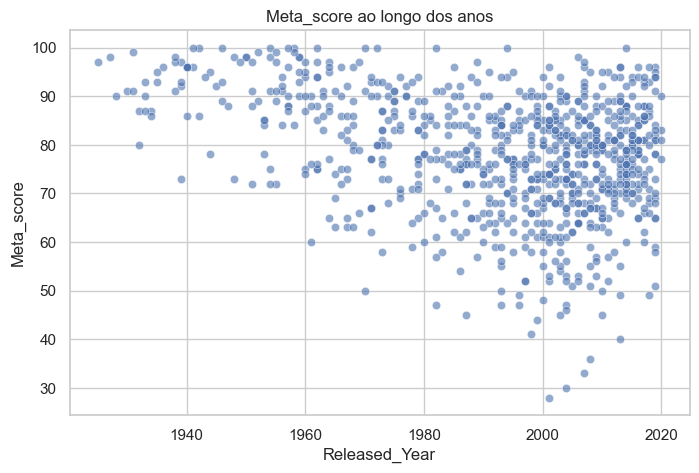

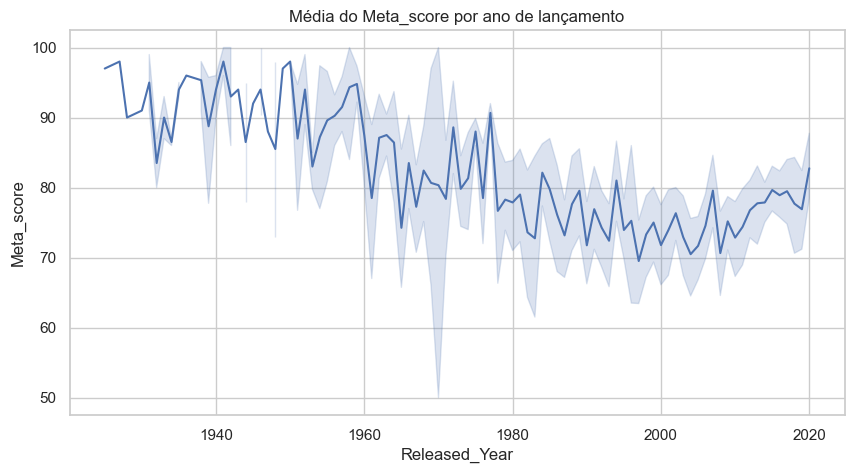

In [264]:
# Scatter
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Released_Year", y="Meta_score", alpha=0.6)
plt.title("Meta_score ao longo dos anos")
plt.show()

# Média por ano
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Released_Year", y="Meta_score", estimator='mean')
plt.title("Média do Meta_score por ano de lançamento")
plt.show()


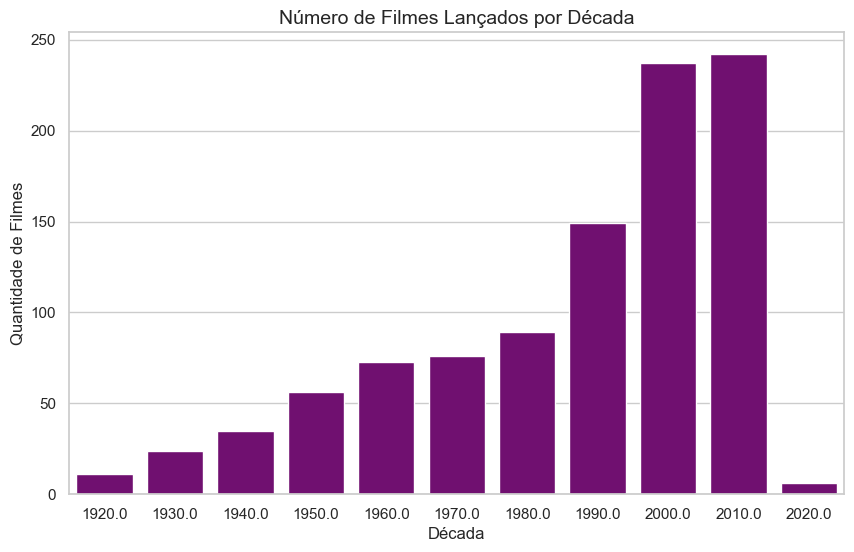

In [265]:
# Agrupando por década sem criar coluna nova
filmes_por_decada = (
    df.dropna(subset=['Released_Year'])
      .astype({'Released_Year': int})
      .groupby(df['Released_Year'] // 10 * 10)
      .size()
)

plt.figure(figsize=(10,6))
sns.barplot(x=filmes_por_decada.index, y=filmes_por_decada.values, color="purple")
plt.title("Número de Filmes Lançados por Década", fontsize=14)
plt.xlabel("Década")
plt.ylabel("Quantidade de Filmes")
plt.show()



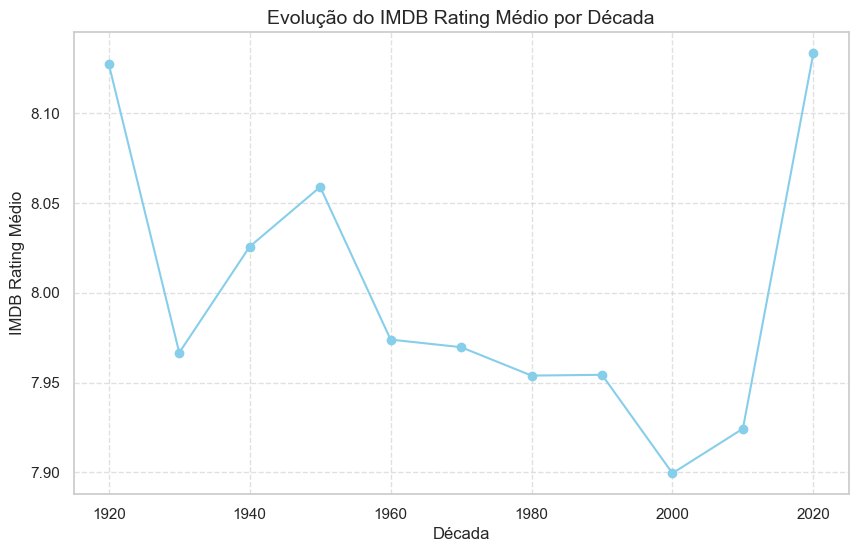

In [266]:
df_imdb_decadas = (
    df.dropna(subset=['Released_Year'])
      .astype({'Released_Year': int})
      .groupby(df['Released_Year'] // 10 * 10)['IMDB_Rating']
      .mean()
)

plt.figure(figsize=(10,6))
plt.plot(df_imdb_decadas.index, df_imdb_decadas.values, marker='o', color="skyblue")
plt.title("Evolução do IMDB Rating Médio por Década", fontsize=14)
plt.xlabel("Década")
plt.ylabel("IMDB Rating Médio")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



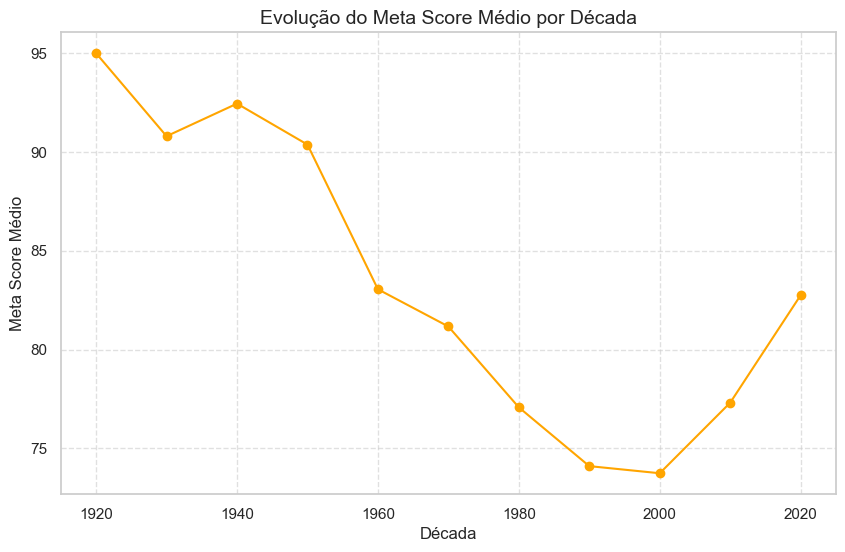

In [267]:
df_meta_decadas = (
    df.dropna(subset=['Released_Year'])
      .astype({'Released_Year': int})
      .groupby(df['Released_Year'] // 10 * 10)['Meta_score']
      .mean()
)

plt.figure(figsize=(10,6))
plt.plot(df_meta_decadas.index, df_meta_decadas.values, marker='o', color="orange")
plt.title("Evolução do Meta Score Médio por Década", fontsize=14)
plt.xlabel("Década")
plt.ylabel("Meta Score Médio")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### 4.4 Gêneros e Classificação: 

Aqui segmento os filmes por **gêneros** e **certificação indicativa**.  
Incluo:
- Top 10 gêneros mais frequentes  
- Médias de IMDB por gênero  
- Distribuição das notas por gênero (boxplots)  
- Distribuição da bilheteria por gênero  
- Médias de IMDB por classificação indicativa (Certificate)

O objetivo é entender diferenças qualitativas e comerciais entre categorias de filmes.


C:\Users\guima\AppData\Local\Temp\ipykernel_8300\81065828.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top15_genres.index, y=top15_genres.values, palette="crest")


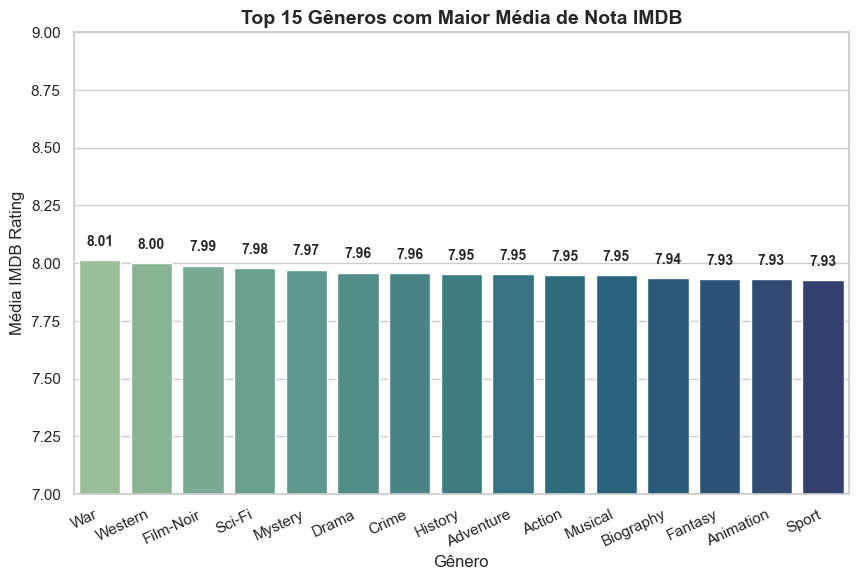

In [268]:
# Cálculo da média de IMDB Rating por gênero
# Cálculo da média de IMDB Rating por gênero
genre_cols = ['Action','Adventure','Animation','Biography','Comedy','Crime',
              'Drama','Family','Fantasy','Film-Noir','History','Horror','Music',
              'Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western']

genre_ratings = df[genre_cols].mul(df["IMDB_Rating"], axis=0).sum() / df[genre_cols].sum()

# Selecionar apenas os 10 melhores
top15_genres = genre_ratings.sort_values(ascending=False).head(15)

# Gráfico de barras verticais
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top15_genres.index, y=top15_genres.values, palette="crest")

# Adicionar rótulos com as notas
for i, v in enumerate(top15_genres.values):
    ax.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom', fontsize=10, weight='bold')

plt.title("Top 15 Gêneros com Maior Média de Nota IMDB", fontsize=14, weight="bold")
plt.xlabel("Gênero")
plt.ylabel("Média IMDB Rating")
plt.ylim(7, 9)
plt.xticks(rotation=25, ha="right")
plt.show()



C:\Users\guima\AppData\Local\Temp\ipykernel_8300\2883230998.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gênero", y="Gross_float", data=df_gross, palette="Set3")


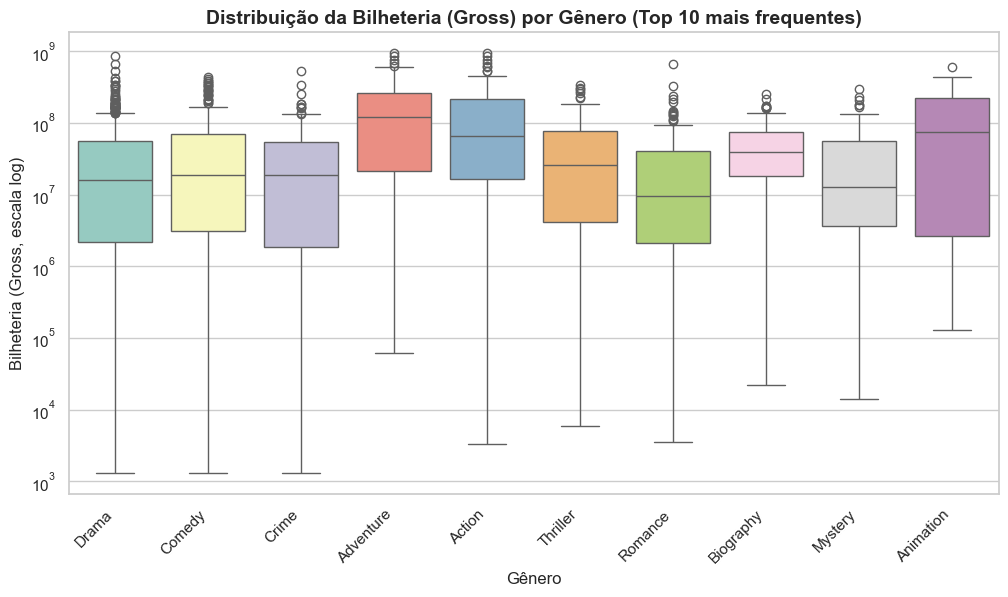

In [269]:
genre_counts = df[genre_cols].sum().sort_values(ascending=False).head(10).index

# Transformar o dataframe no formato longo (gênero, bilheteria)
df_gross = df.melt(
    id_vars=["Gross_float"],
    value_vars=genre_counts,
    var_name="Gênero",
    value_name="Presença"
).query("Presença == 1 & Gross_float.notna()")

# Boxplot da bilheteria por gênero
plt.figure(figsize=(12,6))
sns.boxplot(x="Gênero", y="Gross_float", data=df_gross, palette="Set3")
plt.yscale("log")  # escala log para melhor visualização
plt.title("Distribuição da Bilheteria (Gross) por Gênero (Top 10 mais frequentes)", fontsize=14, weight="bold")
plt.xlabel("Gênero")
plt.ylabel("Bilheteria (Gross, escala log)")
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\guima\AppData\Local\Temp\ipykernel_8300\3166432416.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gênero", y="IMDB_Rating", data=df_generos, palette="Set2")


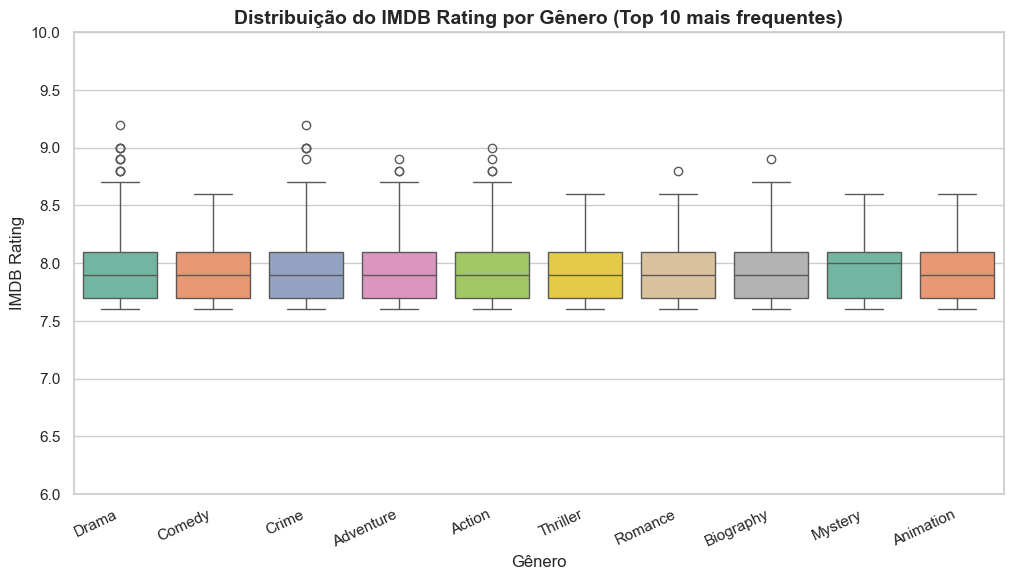

In [270]:
# Selecionar os 10 gêneros mais frequentes (com mais filmes marcados como 1)
genero_counts = df[genre_cols].sum().sort_values(ascending=False).head(10).index

# Criar DataFrame no formato longo: (Gênero, Nota IMDB)
df_generos = (
    df.melt(id_vars=["IMDB_Rating"], value_vars=genero_counts,
            var_name="Gênero", value_name="Presença")
    .query("Presença == 1")
)

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x="Gênero", y="IMDB_Rating", data=df_generos, palette="Set2")
plt.title("Distribuição do IMDB Rating por Gênero (Top 10 mais frequentes)", fontsize=14, weight="bold")
plt.xlabel("Gênero")
plt.ylabel("IMDB Rating")
plt.ylim(6,10)
plt.xticks(rotation=25, ha="right")
plt.show()


C:\Users\guima\AppData\Local\Temp\ipykernel_8300\1845464064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_df, x="Quantidade", y="Gênero", palette="crest")


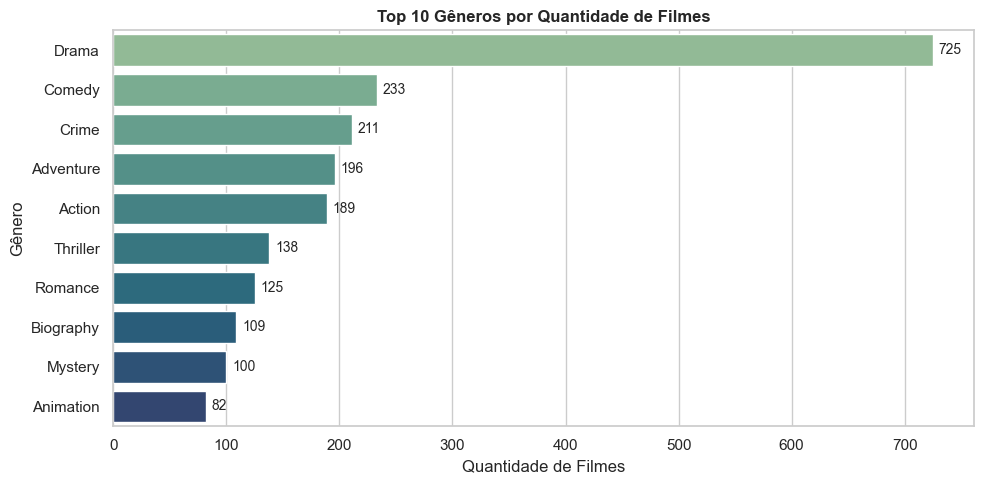

In [271]:


sns.set_theme(style="whitegrid")


# Contagem por gênero usando as dummies (0/1)
counts = df[genre_cols].sum().sort_values(ascending=False).head(10)
plot_df = counts.reset_index()
plot_df.columns = ["Gênero", "Quantidade"]

plt.figure(figsize=(10,5))
ax = sns.barplot(data=plot_df, x="Quantidade", y="Gênero", palette="crest") 
ax.set_title("Top 10 Gêneros por Quantidade de Filmes", weight="bold")
ax.set_xlabel("Quantidade de Filmes")
ax.set_ylabel("Gênero")

# Rótulos no fim de cada barra
for p in ax.patches:
    ax.text(p.get_width() + 5, p.get_y() + p.get_height()/2,
            int(p.get_width()), va="center", ha="left", fontsize=10)

plt.tight_layout()
plt.show()


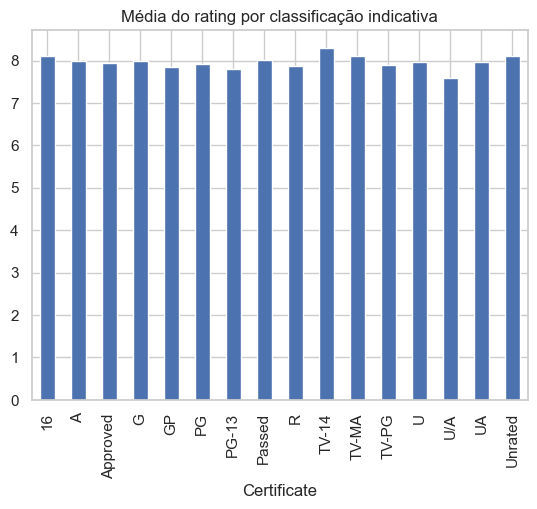

In [272]:
df.groupby("Certificate")["IMDB_Rating"].mean().plot(kind="bar")
plt.title("Média do rating por classificação indicativa")
plt.show()



### 4.5 Popularidade & bilheteria & Diretor:

Nesta parte analiso indicadores de **sucesso** e os **principais realizadores**:
- Filmes mais votados (popularidade)  
- Notas e Metascores dos mais votados  
- Filmes com maior bilheteria  
- Receita dos filmes mais bem avaliados  
- Diretores mais recorrentes  
- Médias de IMDB por diretor

Com isso, consigo conectar **qualidade percebida (notas)**, **engajamento do público (votos)** e **resultado comercial (bilheteria)**, além de destacar os diretores mais relevantes do dataset.

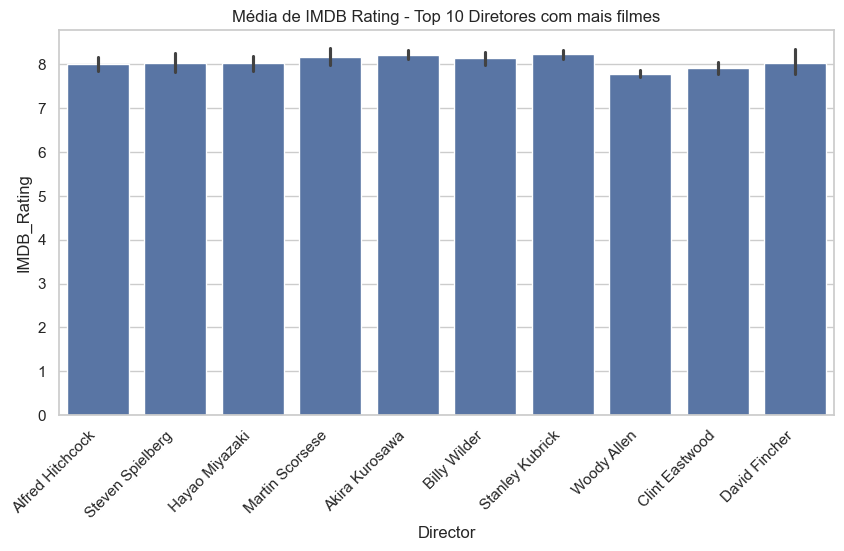

In [273]:
# Top 10 diretores com mais filmes
top_directors = df['Director'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.barplot(data=df[df['Director'].isin(top_directors)],
            x='Director', y='IMDB_Rating',
            estimator=np.mean, order=top_directors)
plt.xticks(rotation=45, ha='right')
plt.title("Média de IMDB Rating - Top 10 Diretores com mais filmes")
plt.show()


C:\Users\guima\AppData\Local\Temp\ipykernel_8300\2181370877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors_count.index, y=top_directors_count.values, palette="crest")


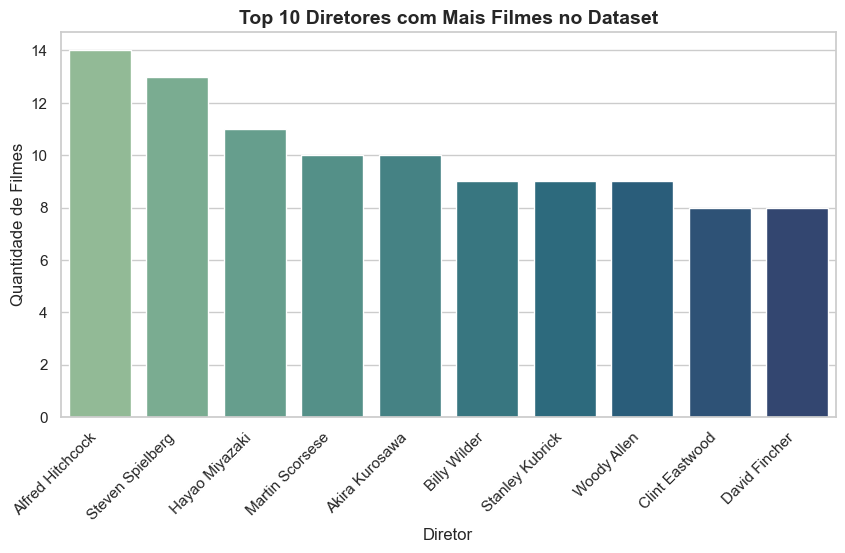

In [274]:
top_directors_count = df['Director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors_count.index, y=top_directors_count.values, palette="crest")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Diretores com Mais Filmes no Dataset", fontsize=14, weight="bold")
plt.xlabel("Diretor")
plt.ylabel("Quantidade de Filmes")
plt.show()


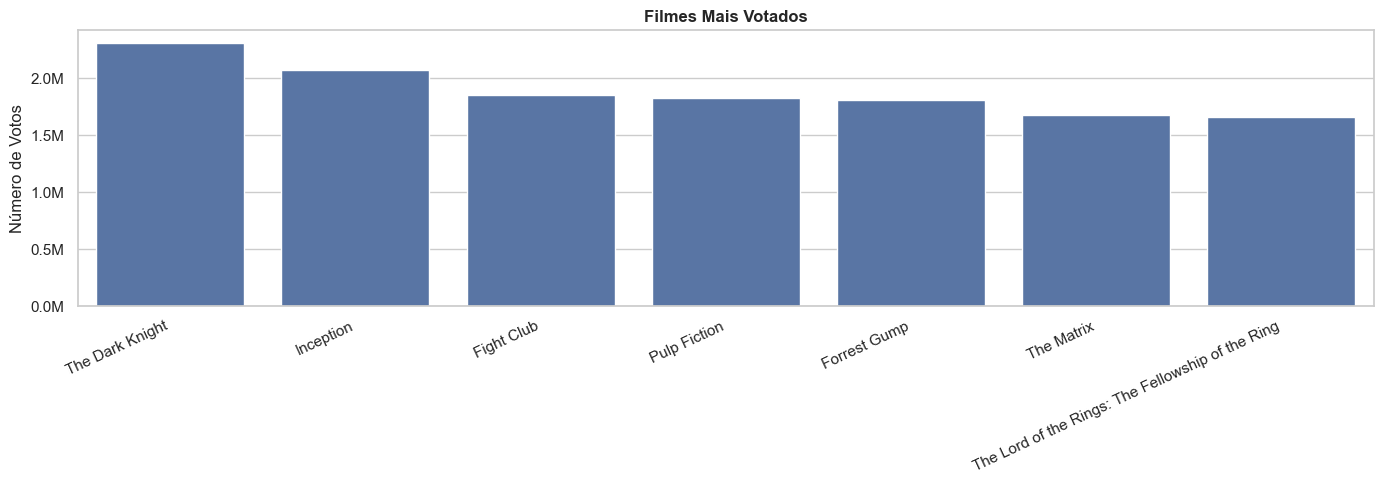

In [275]:
top_voted = (
    df.sort_values("No_of_Votes", ascending=False)
      .head(7)
      .copy()
)

plt.figure(figsize=(14,5))
ax = sns.barplot(
    x="Series_Title", 
    y="No_of_Votes", 
    data=top_voted
)
ax.set_title("Filmes Mais Votados", weight="bold")
ax.set_xlabel("")
ax.set_ylabel("Número de Votos")
ax.yaxis.set_major_formatter(fmt_milhoes)
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


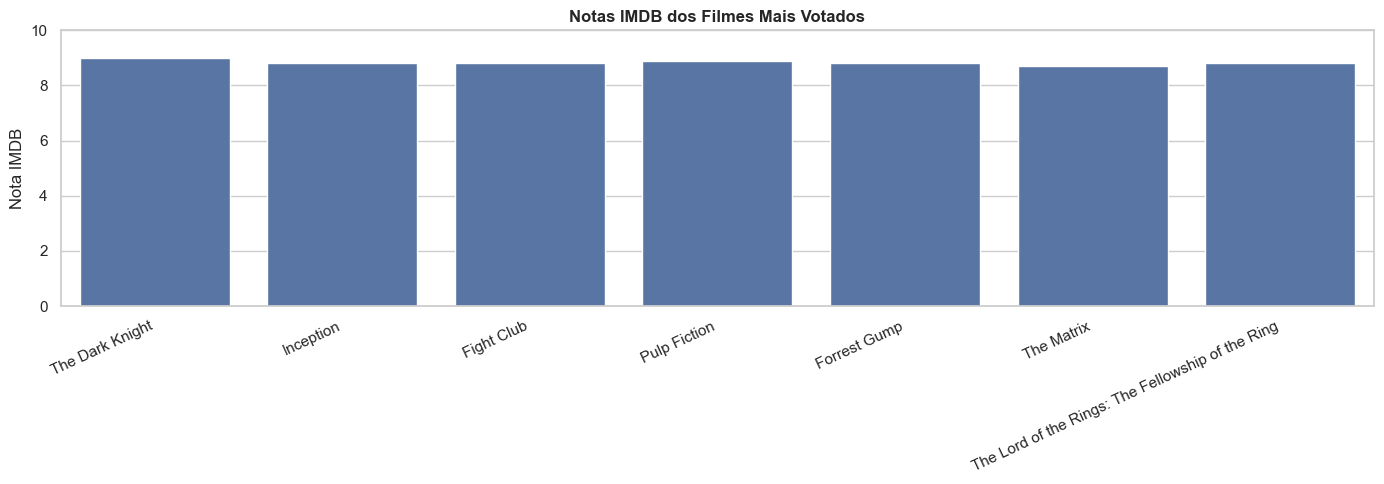

In [276]:
plt.figure(figsize=(14,5))
ax = sns.barplot(
    x="Series_Title", 
    y="IMDB_Rating", 
    data=top_voted
)
ax.set_title("Notas IMDB dos Filmes Mais Votados", weight="bold")
ax.set_xlabel("")
ax.set_ylabel("Nota IMDB")
plt.ylim(0, 10)
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


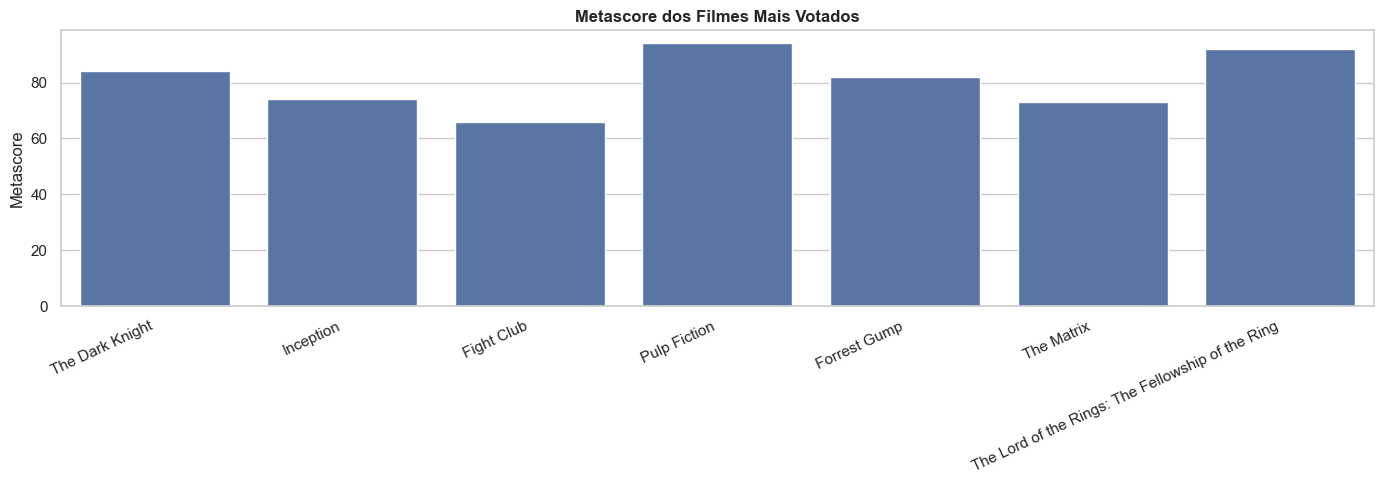

In [277]:
top_voted_meta = top_voted.dropna(subset=["Meta_score"]).copy()

plt.figure(figsize=(14,5))
ax = sns.barplot(
    x="Series_Title", 
    y="Meta_score", 
    data=top_voted_meta
)
ax.set_title("Metascore dos Filmes Mais Votados", weight="bold")
ax.set_xlabel("")
ax.set_ylabel("Metascore")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


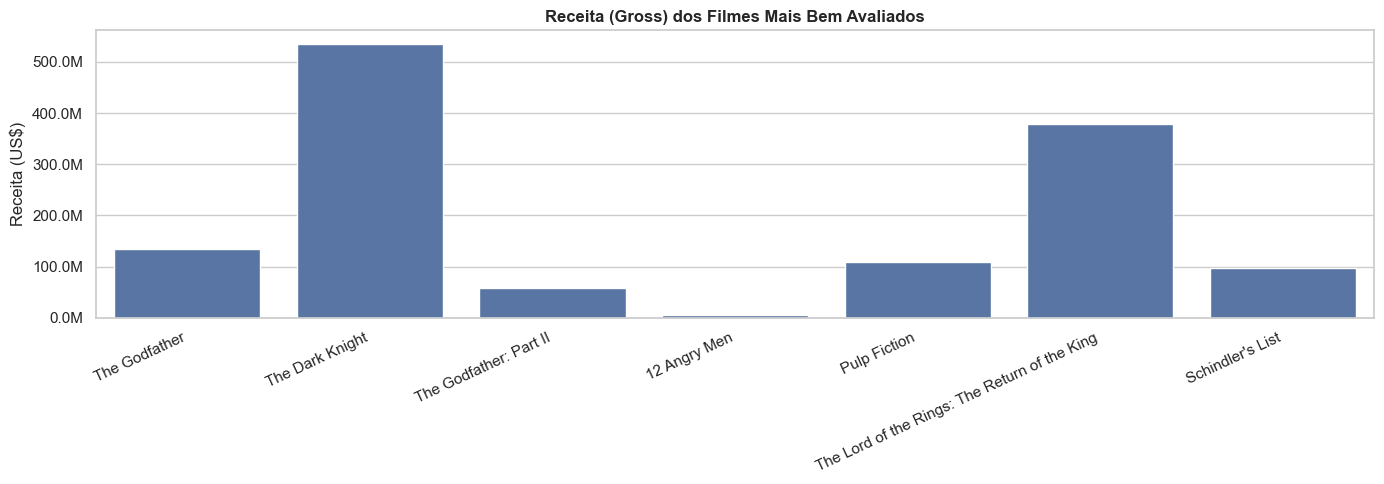

In [278]:
min_votos = 50000  # filtro para evitar filmes com poucos votos
top_rated = (
    df[df["No_of_Votes"] >= min_votos]
      .sort_values(["IMDB_Rating", "No_of_Votes"], ascending=[False, False])
      .head(7)
      .dropna(subset=["Gross_float"])
      .copy()
)

plt.figure(figsize=(14,5))
ax = sns.barplot(
    x="Series_Title", 
    y="Gross_float", 
    data=top_rated
)
ax.set_title("Receita (Gross) dos Filmes Mais Bem Avaliados", weight="bold")
ax.set_xlabel("")
ax.set_ylabel("Receita (US$)")
ax.yaxis.set_major_formatter(fmt_bilhoes if top_rated["Gross_float"].max() >= 1e9 else fmt_milhoes)
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


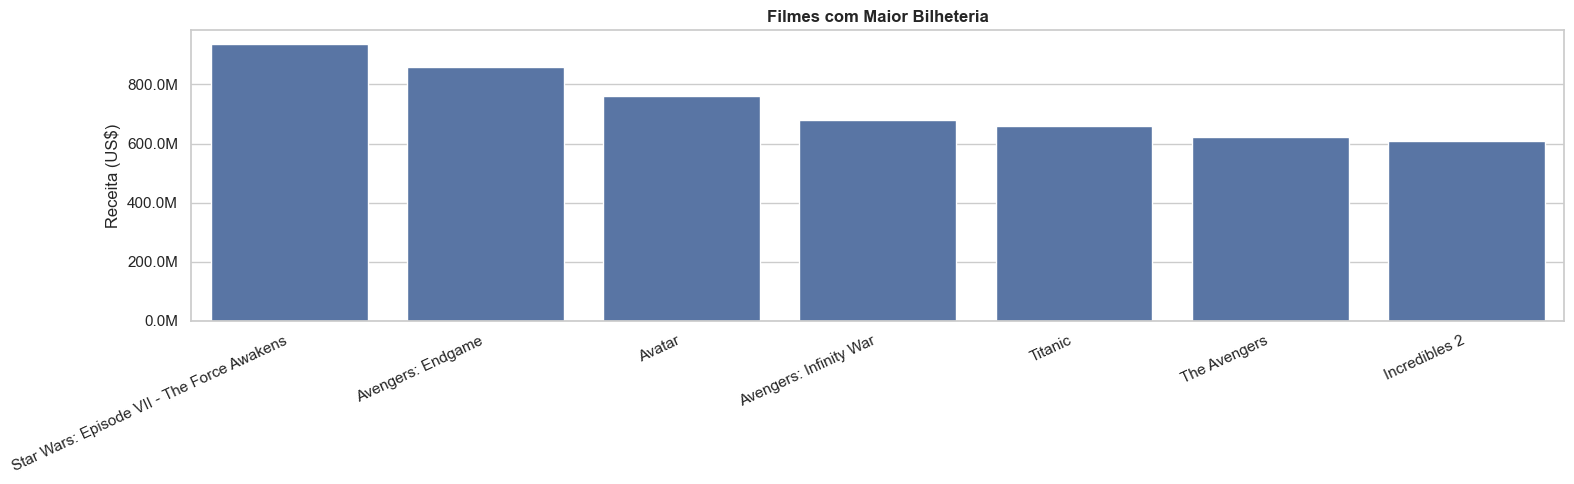

In [279]:
highest_earning = (
    df.dropna(subset=["Gross_float"])
      .sort_values("Gross_float", ascending=False)
      .head(7)
      .copy()
)

plt.figure(figsize=(16,5))
ax = sns.barplot(
    x="Series_Title", 
    y="Gross_float", 
    data=highest_earning
)
ax.set_title("Filmes com Maior Bilheteria", weight="bold")
ax.set_xlabel("")
ax.set_ylabel("Receita (US$)")
ax.yaxis.set_major_formatter(fmt_bilhoes if highest_earning["Gross_float"].max() >= 1e9 else fmt_milhoes)
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


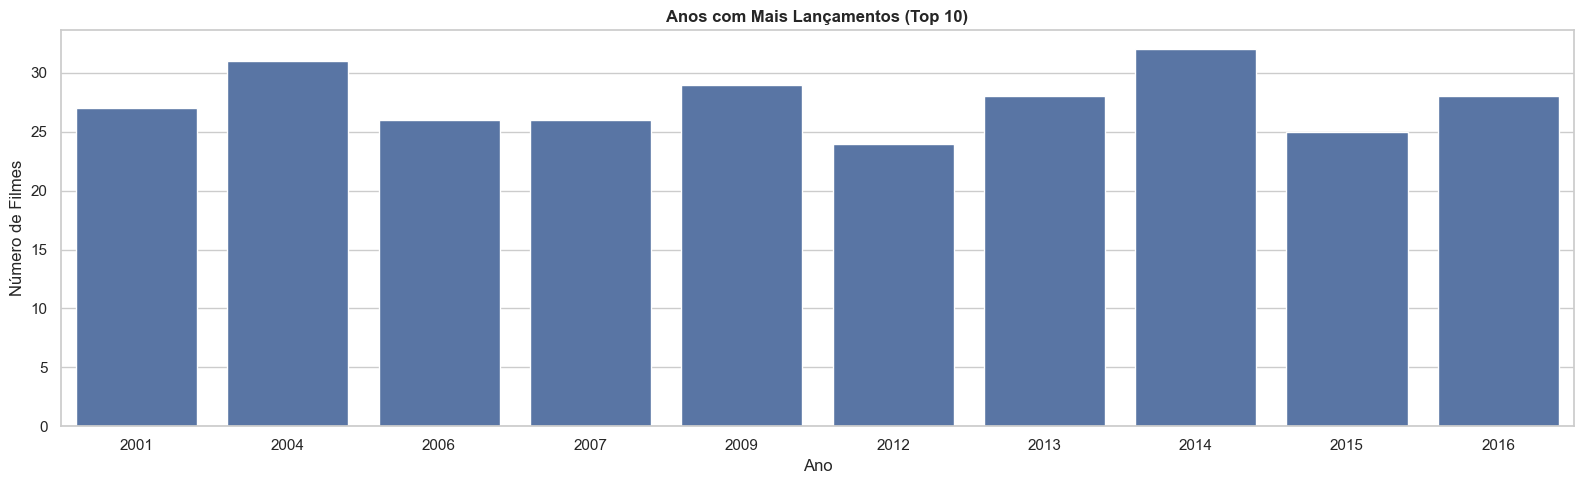

In [280]:
anos_top = (
    df["Released_Year"]
      .dropna()
      .astype(int)
      .value_counts()
      .sort_values(ascending=False)
      .head(10)
      .sort_index()   # opcional: ordenar cronologicamente
)

plt.figure(figsize=(16,5))
ax = sns.barplot(x=anos_top.index, y=anos_top.values)
ax.set_title("Anos com Mais Lançamentos (Top 10)", weight="bold")
ax.set_xlabel("Ano")
ax.set_ylabel("Número de Filmes")
plt.tight_layout()
plt.show()


## 5. Hipoteses:

### Hipótese 1  
**Filmes de ação e aventura tendem a gerar mais bilheteria do que filmes de crime ou comédia, mesmo que as notas médias de avaliação (IMDB) — atribuídas pelo público — sejam muito próximas entre os gêneros.**

#### Evidências nos dados:

- **Bilheteria por gênero (Boxplot)**  
  O boxplot mostra que os gêneros **Ação, Aventura e Animação** apresentam medianas de bilheteria mais altas e maior presença de outliers extremamente lucrativos (blockbusters).  
  Em contraste, gêneros como **Crime e Comédia** concentram bilheteiras menores e distribuições menos dispersas.

- **Notas médias por gênero (Barplot)**  
  O gráfico de médias de IMDB por gênero revela que **as notas são praticamente iguais entre os gêneros**, ficando todas na faixa de **7.9 a 8.0**.  
  Isso indica que o público avalia de forma semelhante filmes de diferentes gêneros, não havendo diferença relevante na percepção de qualidade.

#### Conclusão parcial:  
A análise sugere que **o sucesso comercial está mais associado ao gênero do filme do que à avaliação média do público**.  
Enquanto Ação e Aventura concentram as maiores receitas, os gêneros não se diferenciam de maneira significativa nas notas de avaliação.


--------------------------------

### Hipótese 2  
**Filmes com maior número de votos também tendem a ter maior bilheteria, sugerindo que popularidade (engajamento do público) está relacionada com sucesso comercial.**

#### Evidências nos dados:

- **Heatmap de correlação**  
  A matriz de correlação mostra uma relação positiva entre **No_of_Votes** e **Gross_float** com coeficiente de **0.59**, o mais forte entre as variáveis analisadas.  
  Isso indica que, quanto mais votos um filme recebe, maior tende a ser sua bilheteria.

- **Scatterplot (No. de Votos × Bilheteria, escala log–log)**  
  O gráfico de dispersão mostra uma **tendência ascendente clara**: filmes que acumulam mais votos geralmente registram bilheteiras mais altas.  
  A escala logarítmica deixa evidente que, mesmo em diferentes ordens de grandeza, o padrão de crescimento se mantém.

#### Conclusão parcial:  
Essas evidências reforçam que **popularidade e engajamento do público (número de votos no IMDB) estão diretamente associados ao sucesso financeiro de um filme**.


---------------------------------------------

### Hipótese 3  
**Notas do público (IMDB Rating) e notas da crítica especializada (Meta_score) estão correlacionadas, mas não de forma muito forte. Isso indica que alguns filmes são bem avaliados pelo público, mas não pela crítica, e vice-versa.**

#### Evidências nos dados:

- **Heatmap de correlação**  
  A matriz de correlação mostra uma associação positiva entre **IMDB_Rating** e **Meta_score**, com coeficiente de aproximadamente **0.27**.  
  Apesar de positiva, essa correlação é **moderada**, o que sugere que nem sempre público e crítica concordam em suas avaliações.

- **Scatterplot (Meta_score × IMDB Rating)**  
  O gráfico de dispersão confirma essa leitura:  
  - Existe uma **tendência ascendente geral** (quanto maior o Meta_score, maior tende a ser o IMDB Rating).  
  - Porém, há **grande dispersão de pontos**, indicando que muitos filmes fogem desse padrão — alguns bem avaliados pelo público, mas não pela crítica, e o contrário também.

#### Conclusão parcial:  
A análise mostra que há **alguma convergência entre público e crítica**, mas ela não é forte.  
Isso abre espaço para investigar casos específicos em que há **grande divergência de percepção** entre espectadores e especialistas.


--------------------------------------------------------

### Hipótese 4  
**A crítica especializada (Meta_score) se tornou mais rigorosa ao longo do tempo, resultando em notas médias mais baixas para filmes lançados em décadas recentes.**

#### Evidências nos dados:

- **Heatmap de correlação**  
  A matriz de correlação mostra uma relação **negativa moderada (-0.34)** entre `Released_Year` e `Meta_score`.  
  Isso indica que, conforme os anos avançam, os filmes tendem a receber notas mais baixas da crítica especializada.

- **Gráficos temporais de Meta_score**  
  A evolução do **Meta_score médio por ano/década** evidencia uma **queda consistente ao longo das décadas**, com destaque para uma redução acentuada a partir de 1960.  
  Apenas nos anos mais recentes há uma leve recuperação, mas ainda em patamar inferior ao do início do século XX.

#### Conclusão parcial:  
Os dados sugerem que a **crítica se tornou mais rigorosa ou menos generosa em suas avaliações ao longo do tempo**, ao contrário do público (IMDB Rating), cujas notas se mantêm relativamente estáveis.


-----------------------------

### Hipótese 5  
**Filmes com maior número de votos tendem a receber notas médias ligeiramente mais altas no IMDB, sugerindo que a popularidade pode estar associada a avaliações mais positivas do público.**

#### Evidências nos dados:

- **Heatmap de correlação**  
  O mapa de correlação mostra uma associação positiva entre **No_of_Votes** e **IMDB_Rating**, com coeficiente de **0.48**.  
  Esse valor indica uma correlação **moderada**, ou seja, filmes com mais votos tendem a apresentar notas um pouco mais altas.

- **Dispersão (No. de Votos × IMDB Rating)**  
  O gráfico de dispersão com escala log no eixo X evidencia que filmes com maior número de votos se concentram em notas elevadas no IMDB.  
  A linha de regressão (vermelha) mostra uma tendência ascendente, ainda que suave, reforçando a ideia de que maior popularidade está ligada a avaliações médias mais altas.

#### Conclusão parcial:  
A análise sugere que **a popularidade de um filme (quantidade de votos)** pode ter influência sobre **sua avaliação média no IMDB**.  
Embora a correlação não seja forte, os dados indicam que filmes muito votados tendem a consolidar **notas mais altas** do público.


# 6. Integração com Outra Base de Dados

Além da análise feita com a base original de **999 filmes (IMDB Top 1000)**, salvei os dados tratados para um **futuro processo de integração** com uma segunda base, composta por **5000 filmes adicionais do IMDB**.  

Esse processo de junção já foi desenvolvido em um **01_2_extra_data.ipynb**, com o objetivo de:  
- Aumentar o número de registros disponíveis para análise.  
- Enriquecer o conjunto de dados com novas variáveis e filmes não contemplados na base inicial.  
- Permitir comparações mais amplas sobre padrões de gênero, bilheteria, popularidade e avaliações ao longo do tempo.  

> **Observação:** nesta análise atual permaneço apenas com a base original (999 filmes), mas mantenho documentado que existe uma versão expandida do dataset já preparada para as proximas etapas do desafio!!.

Salvando o Dataset atual na pasta de dados processados, para usar futuramente.

In [281]:
df.to_csv("..\data\processed\df_eda01.csv", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\guima\AppData\Local\Temp\ipykernel_8300\2351804487.py:1: SyntaxWarning: invalid escape sequence '\d'
  df.to_csv("..\data\processed\df_eda01.csv", index=False)
